In [70]:
import numpy as np
import matplotlib.pyplot as plt



In [71]:
x = [[1],[2],[3],[4],]
y = [1.3, 3.6, 4.3, 6.5]


x = np.array(x)
y = np.array(y)

In [72]:
x , y

(array([[1],
        [2],
        [3],
        [4]]),
 array([1.3, 3.6, 4.3, 6.5]))

In [73]:
x.shape, y.shape

((4, 1), (4,))

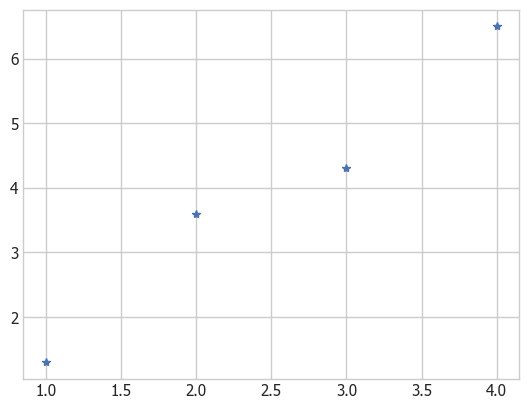

In [74]:
plt.plot(x, y, '*')
plt.show()

In [75]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [76]:
model.coef_[0], model.intercept_

(np.float64(1.63), np.float64(-0.14999999999999947))

In [77]:
model.predict([[10]])

array([16.15])

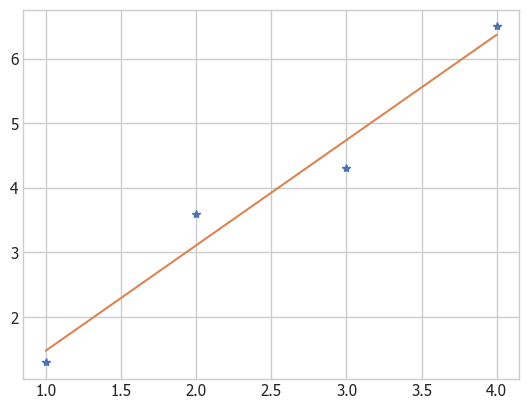

In [78]:
plt.plot(x, y, '*')
plt.plot(x, model.predict(x))
plt.show()

In [79]:
x = np.linspace(1, 360, 360 )
y = np.array([2 * i + (np.random.rand() - 0.5) * 20 for i in x])

x = x.reshape(-1, 1)

In [80]:
model = LinearRegression()
model.fit(x, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


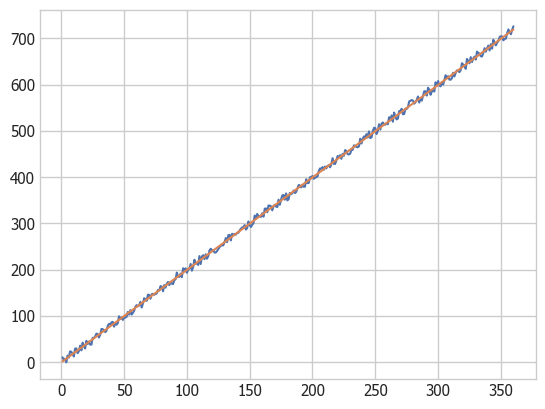

In [81]:
plt.plot(x, y)
plt.plot(x, model.predict(x))
plt.show()

In [82]:
x[0], y[0], model.predict(x[0].reshape(-1, 1))

(array([1.]), np.float64(10.592117548439784), array([1.79926087]))

In [83]:
x[3], y[3], model.predict(x[3].reshape(-1, 1))

(array([4.]), np.float64(-0.20747321690115683), array([7.79625921]))

In [84]:
error = np.array([abs(y[i] - model.predict(x[i].reshape(-1, 1))) for i in range(1, 100)])
mae = np.average(error)

print(mae)


4.573837633873371


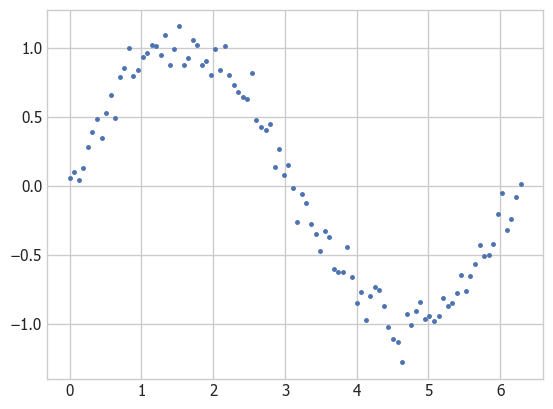

In [85]:
# Generate x values
x = np.linspace(0, 2*np.pi, 100)

# Generate sin values with noise
y = np.sin(x) + np.random.normal(0, 0.1, len(x))

# Create the plot
plt.plot(x, y, 'b.', label='sin(x) + noise', markersize=5)
plt.show()

In [86]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


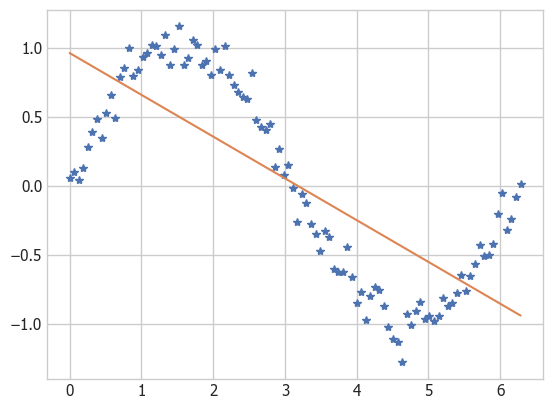

In [87]:
plt.plot(x, y, '*')
plt.plot(x, model.predict(x))
plt.show()

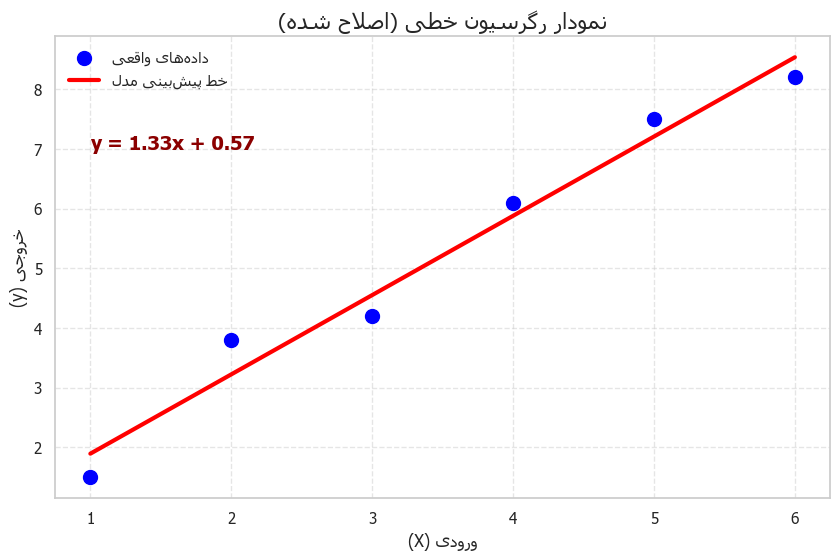

ﺪﺻﺭﺩ 97.3 :ﻝﺪﻣ ﺖﻗﺩ


In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# --- بخش جدید: فارسی‌ساز ---
import arabic_reshaper
from bidi.algorithm import get_display

def fa(text):
    """این تابع متن فارسی را برای نمایش در نمودار اصلاح می‌کند"""
    reshaped_text = arabic_reshaper.reshape(text)  # چسباندن حروف
    bidi_text = get_display(reshaped_text)         # اصلاح جهت راست‌چین
    return bidi_text

# تنظیمات ظاهری
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Tahoma'  # فونت استاندارد ویندوز

# 1. داده‌ها
X_raw = np.array([[1], [2], [3], [4], [5], [6]])
y_raw = np.array([1.5, 3.8, 4.2, 6.1, 7.5, 8.2])

# 2. مدل‌سازی
model = LinearRegression()
model.fit(X_raw, y_raw)
y_pred = model.predict(X_raw)

# 3. محاسبات
r2 = r2_score(y_raw, y_pred)
equation = f"y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}"

# 4. رسم نمودار اصلاح شده
plt.figure(figsize=(10, 6))

# نقاط و خط با متن فارسی اصلاح شده
plt.scatter(X_raw, y_raw, color='blue', s=100, label=fa('داده‌های واقعی'))
plt.plot(X_raw, y_pred, color='red', linewidth=3, label=fa('خط پیش‌بینی مدل'))

plt.title(fa('نمودار رگرسیون خطی (اصلاح شده)'), fontsize=16)
plt.xlabel(fa('ورودی (X)'), fontsize=12)
plt.ylabel(fa('خروجی (y)'), fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# نمایش فرمول روی نمودار
plt.text(1, 7, equation, fontsize=14, color='darkred', weight='bold')

plt.show()

print(fa(f"دقت مدل: {r2*100:.1f} درصد"))

✅ فایل داده‌ها بارگذاری شد:
   Area  Rooms  Age  Price
0    60      1   15    1.5
1    75      2   10    3.8
2    85      2    8    4.2
3   100      3    5    6.1
4   120      3    2    7.5


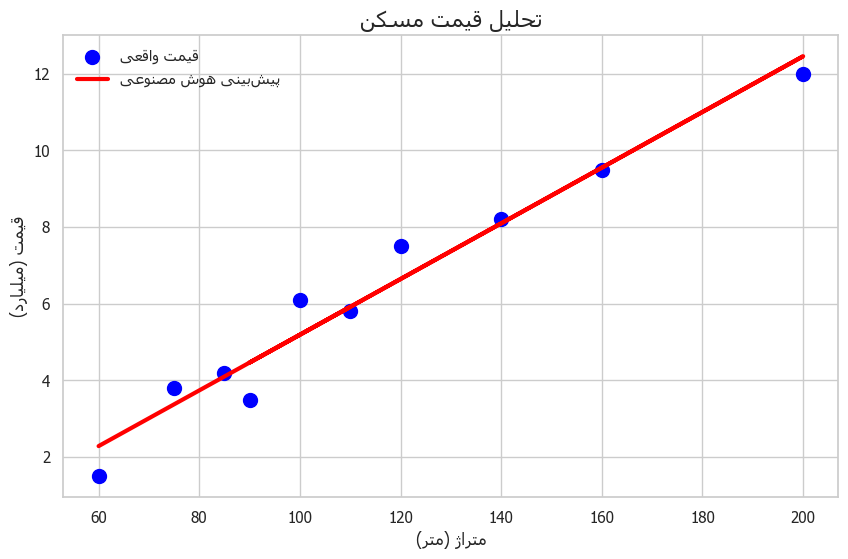

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import arabic_reshaper
from bidi.algorithm import get_display

# تنظیمات فارسی و گرافیکی
def fa(text):
    return get_display(arabic_reshaper.reshape(text))

sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Tahoma'

# 1. خواندن فایل داده
try:
    df = pd.read_csv('data.csv')
    print("✅ فایل داده‌ها بارگذاری شد:")
    print(df.head()) # نمایش ۵ خط اول
except:
    print("❌ خطا: فایل data.csv پیدا نشد! لطفا فایل را بسازید.")

# 2. آماده‌سازی برای هوش مصنوعی
X = df[['Area']] # ورودی: متراژ
y = df['Price']  # خروجی: قیمت

# 3. آموزش مدل
model = LinearRegression()
model.fit(X, y)
prediction = model.predict(X)

# 4. رسم نمودار
plt.figure(figsize=(10, 6))
plt.scatter(df['Area'], df['Price'], color='blue', s=100, label=fa('قیمت واقعی'))
plt.plot(df['Area'], prediction, color='red', linewidth=3, label=fa('پیش‌بینی هوش مصنوعی'))

plt.title(fa('تحلیل قیمت مسکن'), fontsize=16)
plt.xlabel(fa('متراژ (متر)'), fontsize=12)
plt.ylabel(fa('قیمت (میلیارد)'), fontsize=12)
plt.legend()
plt.show()

----------------------------------------
ﺮﺘﻣ 135 :ﺎﻤﺷ ﺮﻈﻧ ﺩﺭﻮﻣ ﮊﺍﺮﺘﻣ 🏠
ﻥﺎﻣﻮﺗ ﺩﺭﺎﯿﻠﯿﻣ 7.79 :ﻩﺪﺷ ﯽﻨﯿﺑﺶﯿﭘ ﺖﻤﯿﻗ 💰
%2619.7- :ﺖﺴﺗ ﯼﺎﻫﻩﺩﺍﺩ ﺭﺩ ﻝﺪﻣ ﺖﻗﺩ 📊
----------------------------------------


c:\Users\SilentGalaxy\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\SilentGalaxy\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


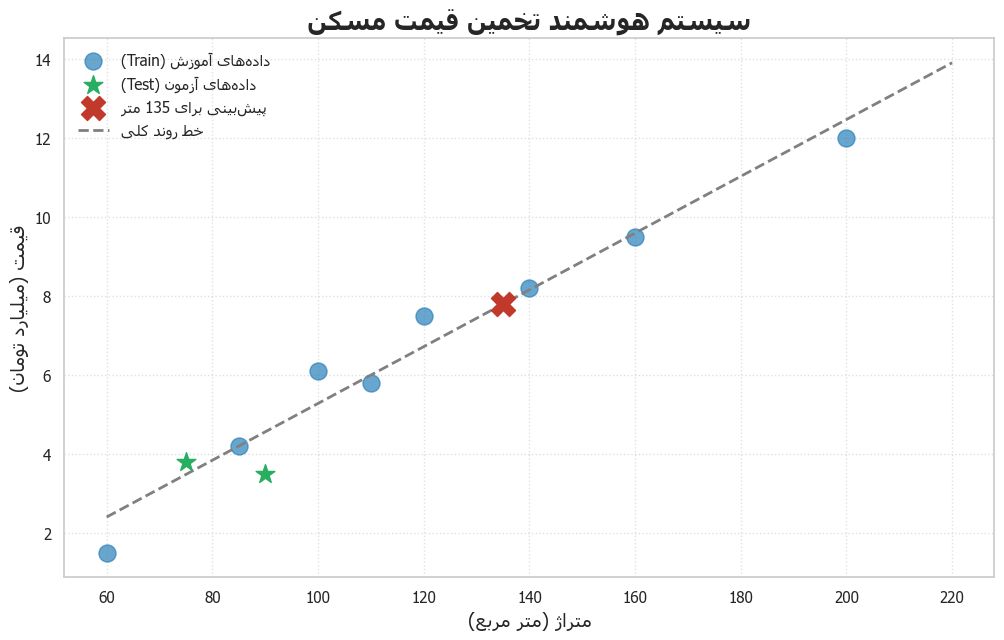

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import arabic_reshaper
from bidi.algorithm import get_display

# --- تابع فارسی‌ساز ---
def fa(text):
    return get_display(arabic_reshaper.reshape(text))

sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Tahoma'

# ==========================================
# 1. تنظیمات ورودی کاربر (اینجا رو می‌تونی تغییر بدی)
# ==========================================
NEW_HOUSE_SIZE = 135  # مثلا: می‌خوایم قیمت یک خونه ۱۳۵ متری رو پیش‌بینی کنیم

# ==========================================
# 2. بارگذاری و آماده‌سازی داده‌ها
# ==========================================
try:
    df = pd.read_csv('data.csv')
    X = df[['Area']]
    y = df['Price']
    
    # تقسیم داده‌ها: ۸۰٪ برای آموزش، ۲۰٪ برای امتحان
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
except:
    print("❌ خطا: فایل data.csv یافت نشد.")
    X, y = np.array([[1]]), np.array([1])

# ==========================================
# 3. آموزش مدل (فقط با داده‌های آموزشی)
# ==========================================
model = LinearRegression()
model.fit(X_train, y_train)

# ==========================================
# 4. پیش‌بینی و ارزیابی
# ==========================================
# پیش‌بینی قیمت خانه مورد نظر شما
predicted_price = model.predict([[NEW_HOUSE_SIZE]])[0]

# محاسبه دقت مدل روی داده‌های تست (امتحان واقعی)
test_score = model.score(X_test, y_test)

# ==========================================
# 5. گزارش متنی
# ==========================================
print("-" * 40)
print(fa(f"🏠 متراژ مورد نظر شما: {NEW_HOUSE_SIZE} متر"))
print(fa(f"💰 قیمت پیش‌بینی شده: {predicted_price:.2f} میلیارد تومان"))
print(fa(f"📊 دقت مدل در داده‌های تست: {test_score*100:.1f}%"))
print("-" * 40)

# ==========================================
# 6. رسم نمودار پیشرفته
# ==========================================
plt.figure(figsize=(12, 7))

# رسم داده‌های آموزش (آبی)
plt.scatter(X_train, y_train, color='#2980b9', s=150, label=fa('داده‌های آموزش (Train)'), alpha=0.7)

# رسم داده‌های تست (سبز) - این‌ها را مدل ندیده بود
plt.scatter(X_test, y_test, color='#27ae60', s=200, marker='*', label=fa('داده‌های آزمون (Test)'), zorder=5)

# رسم نقطه پیش‌بینی شده جدید (قرمز)
plt.scatter([NEW_HOUSE_SIZE], [predicted_price], color='#c0392b', s=300, marker='X', label=fa(f'پیش‌بینی برای {NEW_HOUSE_SIZE} متر'), zorder=10)

# خط رگرسیون (روی کل دامنه)
x_range = np.linspace(X.min(), X.max() + 20, 100).reshape(-1, 1)
y_range = model.predict(x_range)
plt.plot(x_range, y_range, color='gray', linestyle='--', linewidth=2, label=fa('خط روند کلی'))

plt.title(fa('سیستم هوشمند تخمین قیمت مسکن'), fontsize=18, fontweight='bold')
plt.xlabel(fa('متراژ (متر مربع)'), fontsize=14)
plt.ylabel(fa('قیمت (میلیارد تومان)'), fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, linestyle=':', alpha=0.6)

plt.show()

✅ داده‌های چند متغیره بارگذاری شد.


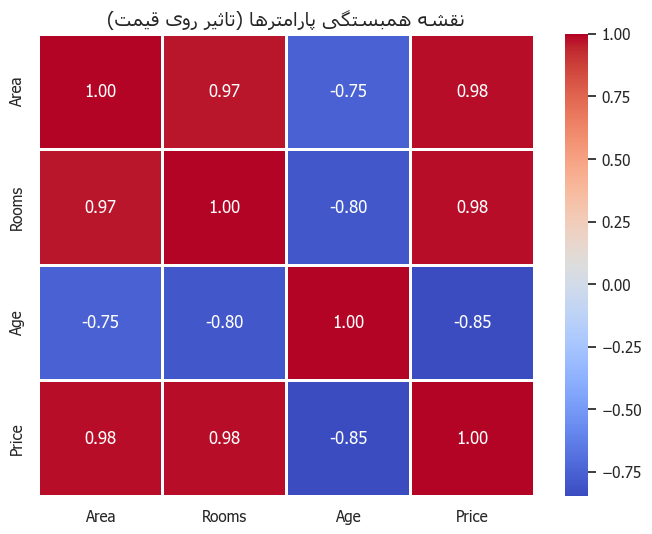

ﺖﺧﺎﺳ ﻝﺎﺳ 5 ،ﻪﺑﺍﻮﺧ 3 ،ﺮﺘﻣ 135 :ﺕﺎﺼﺨﺸﻣ 📋
ﻥﺎﻣﻮﺗ ﺩﺭﺎﯿﻠﯿﻣ 7.303 :ﯽﻋﻮﻨﺼﻣ ﺵﻮﻫ ﻩﺪﺷ ﯽﺳﺎﻨﺷﺭﺎﮐ ﺖﻤﯿﻗ 💎


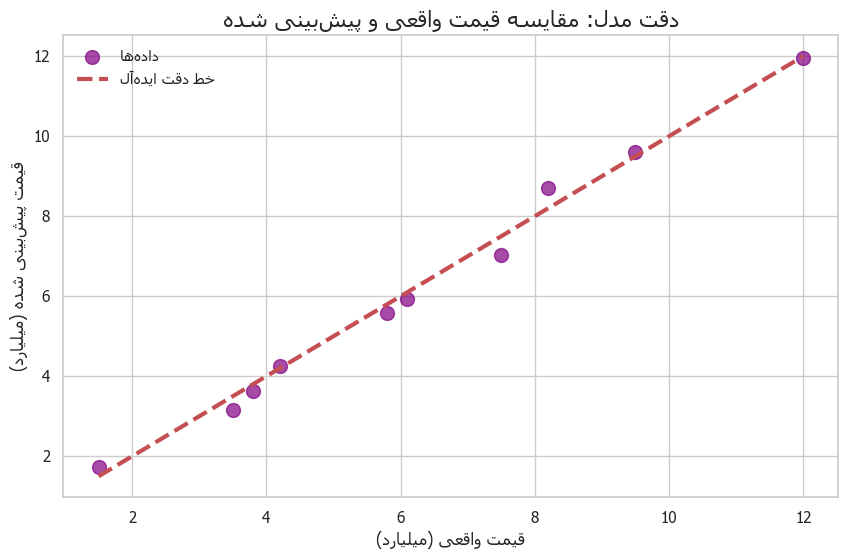

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import arabic_reshaper
from bidi.algorithm import get_display

# --- تابع فارسی‌ساز ---
def fa(text):
    return get_display(arabic_reshaper.reshape(text))

sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Tahoma'

# ==========================================
# 1. تنظیمات ورودی شما (خانه رویایی‌تان را توصیف کنید)
# ==========================================
MY_AREA = 135   # متراژ
MY_ROOMS = 3    # تعداد اتاق
MY_AGE = 5      # سن بنا (سال)

# ==========================================
# 2. بارگذاری داده‌های جدید
# ==========================================
try:
    df = pd.read_csv('data.csv')
    print("✅ داده‌های چند متغیره بارگذاری شد.")
    
    # ورودی‌ها (X) الان ۳ تا هستند
    X = df[['Area', 'Rooms', 'Age']]
    y = df['Price']
    
    # تقسیم داده‌ها
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

except:
    print("❌ خطا در خواندن فایل.")

# ==========================================
# 3. تحلیل همبستگی (Heatmap) - ویژگی جدید!
# ==========================================
# این نمودار نشان می‌دهد کدام پارامترها با هم رابطه قوی دارند
plt.figure(figsize=(8, 6))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title(fa('نقشه همبستگی پارامترها (تاثیر روی قیمت)'), fontsize=14)
plt.show()

# ==========================================
# 4. آموزش و پیش‌بینی
# ==========================================
model = LinearRegression()
model.fit(X_train, y_train)

# پیش‌بینی برای ورودی‌های شما
input_data = pd.DataFrame([[MY_AREA, MY_ROOMS, MY_AGE]], columns=['Area', 'Rooms', 'Age'])
predicted_price = model.predict(input_data)[0]

print("=" * 50)
print(fa(f"📋 مشخصات: {MY_AREA} متر، {MY_ROOMS} خوابه، {MY_AGE} سال ساخت"))
print(fa(f"💎 قیمت کارشناسی شده هوش مصنوعی: {predicted_price:.3f} میلیارد تومان"))
print("=" * 50)

# ==========================================
# 5. نمودار مقایسه (واقعیت vs پیش‌بینی)
# ==========================================
# چون نمی‌توانیم نمودار ۴ بعدی بکشیم، "قیمت واقعی" را با "قیمت پیش‌بینی شده" مقایسه می‌کنیم
y_pred_all = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_all, color='purple', s=100, alpha=0.7, label=fa('داده‌ها'))

# خط ایده‌آل (جایی که پیش‌بینی دقیقاً برابر واقعیت است)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=3, label=fa('خط دقت ایده‌آل'))

plt.title(fa('دقت مدل: مقایسه قیمت واقعی و پیش‌بینی شده'), fontsize=16)
plt.xlabel(fa('قیمت واقعی (میلیارد)'), fontsize=12)
plt.ylabel(fa('قیمت پیش‌بینی شده (میلیارد)'), fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [92]:
import pandas as pd
import numpy as np

# تنظیمات تولید داده تصادفی (ولی منطقی)
np.random.seed(42)
n_samples = 500

# 1. تولید متراژ (بین ۵۰ تا ۴۰۰ متر)
area = np.random.randint(50, 400, n_samples)

# 2. تولید تعداد اتاق (بین ۱ تا ۶ خواب)
# منطق: خونه‌های بزرگتر معمولا اتاق بیشتر دارند
rooms = (area // 70) + np.random.randint(0, 2, n_samples) 

# 3. تولید سن بنا (بین ۰ تا ۳۰ سال)
age = np.random.randint(0, 30, n_samples)

# 4. فرمول سری قیمت (این فرمولیه که ماشین باید کشف کنه!)
# قیمت پایه + (متراژ * ۵۰) + (اتاق * ۳۰۰) - (سن * ۲۰) + کمی نویز بازار
base_price = 500 # قیمت پایه (مثلا ۵۰۰ میلیون)
price = base_price + (area * 0.08) + (rooms * 0.5) - (age * 0.1) + np.random.normal(0, 0.5, n_samples)

# ذخیره در فایل
df = pd.DataFrame({'Area': area, 'Rooms': rooms, 'Age': age, 'Price': price})
df.to_csv('house_data_500.csv', index=False)

print("✅ فایل house_data_500.csv با ۵۰۰ داده نمونه ساخته شد!")

✅ فایل house_data_500.csv با ۵۰۰ داده نمونه ساخته شد!


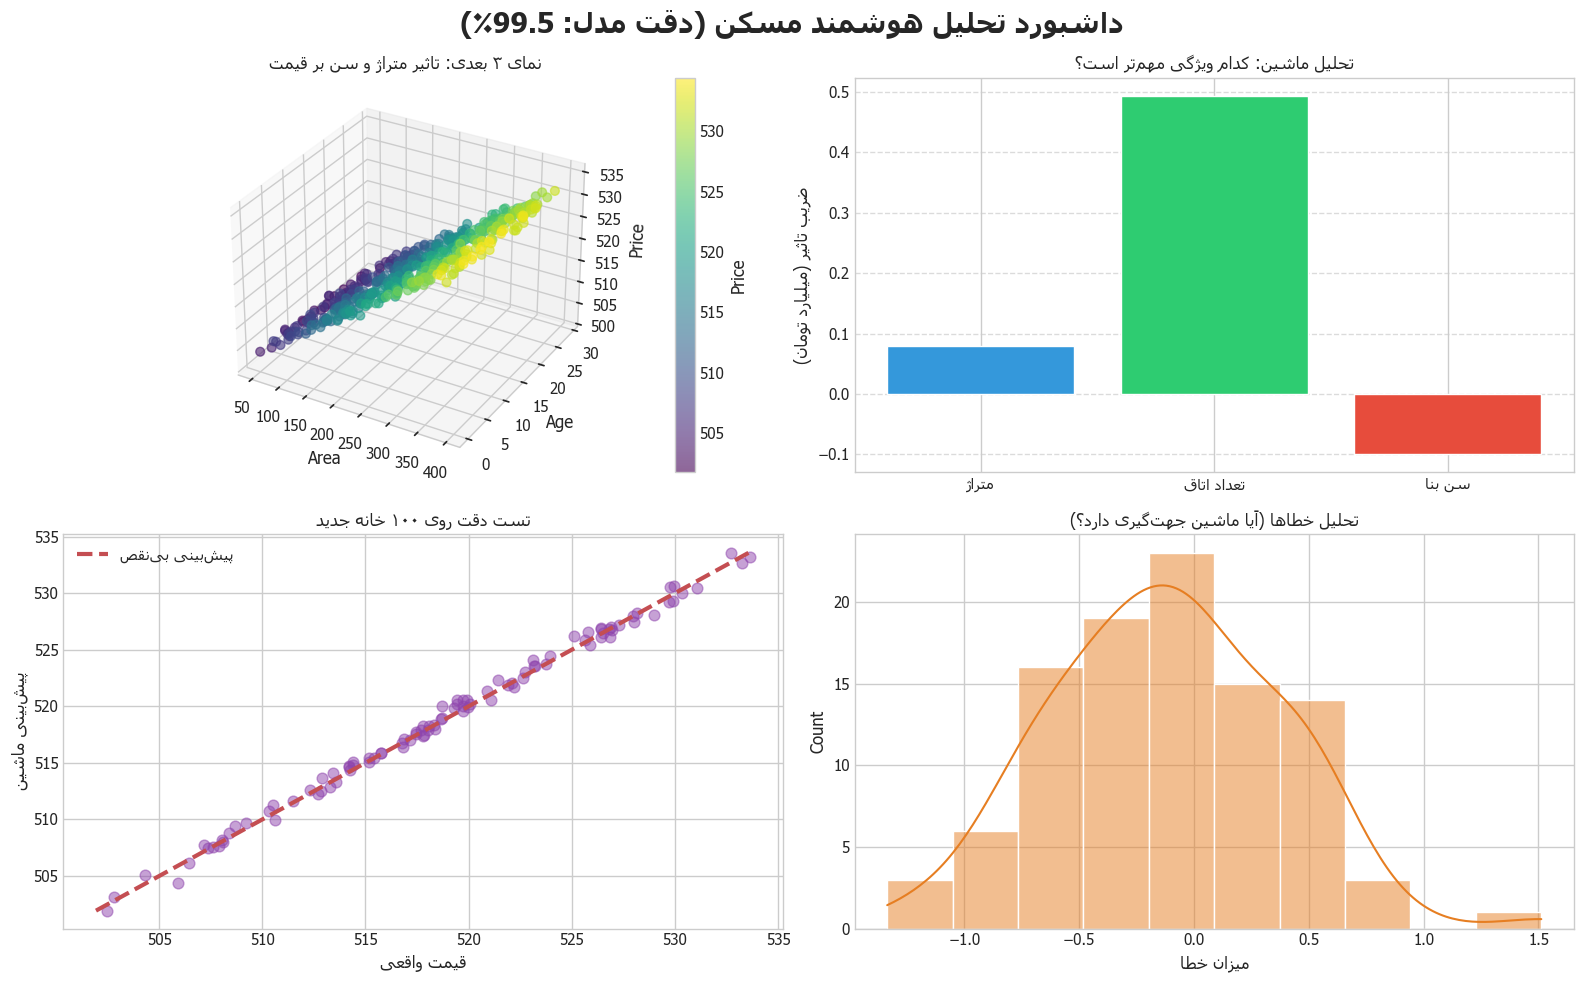

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import arabic_reshaper
from bidi.algorithm import get_display

# --- تنظیمات فارسی و گرافیکی ---
def fa(text):
    return get_display(arabic_reshaper.reshape(text))

plt.style.use('seaborn-v0_8-whitegrid') # استایل مدرن
plt.rcParams['font.family'] = 'Tahoma'

# ==========================================
# 1. بارگذاری داده‌های انبوه
# ==========================================
try:
    df = pd.read_csv('house_data_500.csv')
    X = df[['Area', 'Rooms', 'Age']]
    y = df['Price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # آموزش مدل
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    
except FileNotFoundError:
    print("❌ فایل داده پیدا نشد. لطفا کد مرحله اول را اجرا کنید.")

# ==========================================
# 2. طراحی داشبورد (Dashboard Layout)
# ==========================================
fig = plt.figure(figsize=(16, 10))
fig.suptitle(fa(f'داشبورد تحلیل هوشمند مسکن (دقت مدل: {score*100:.1f}٪)'), fontsize=20, weight='bold')

# --- نمودار ۱: فضای سه بعدی (Area, Age, Price) ---
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
sc = ax1.scatter(df['Area'], df['Age'], df['Price'], c=df['Price'], cmap='viridis', s=40, alpha=0.6)
ax1.set_xlabel('Area')
ax1.set_ylabel('Age')
ax1.set_zlabel('Price')
ax1.set_title(fa('نمای ۳ بعدی: تاثیر متراژ و سن بر قیمت'), fontsize=12)
plt.colorbar(sc, ax=ax1, label='Price', pad=0.1)

# --- نمودار ۲: اهمیت ویژگی‌ها (Feature Importance) ---
# ماشین چقدر به هر پارامتر اهمیت داده؟
ax2 = fig.add_subplot(2, 2, 2)
importance = model.coef_
features = [fa('متراژ'), fa('تعداد اتاق'), fa('سن بنا')]
colors = ['#3498db', '#2ecc71', '#e74c3c']
ax2.bar(features, importance, color=colors)
ax2.set_title(fa('تحلیل ماشین: کدام ویژگی مهم‌تر است؟'), fontsize=12)
ax2.set_ylabel(fa('ضریب تاثیر (میلیارد تومان)'))
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# --- نمودار ۳: مقایسه واقعی vs پیش‌بینی (روی ۵۰۰ داده) ---
ax3 = fig.add_subplot(2, 2, 3)
ax3.scatter(y_test, y_pred, color='#8e44ad', alpha=0.5, s=60)
# خط ایده آل
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
ax3.plot([min_val, max_val], [min_val, max_val], 'r--', lw=3, label=fa('پیش‌بینی بی‌نقص'))
ax3.set_xlabel(fa('قیمت واقعی'))
ax3.set_ylabel(fa('پیش‌بینی ماشین'))
ax3.set_title(fa('تست دقت روی ۱۰۰ خانه جدید'), fontsize=12)
ax3.legend()

# --- نمودار ۴: توزیع خطاها (Residuals) ---
# خطاها باید نرمال باشند (شکل زنگوله)
ax4 = fig.add_subplot(2, 2, 4)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='#e67e22', ax=ax4)
ax4.set_title(fa('تحلیل خطاها (آیا ماشین جهت‌گیری دارد؟)'), fontsize=12)
ax4.set_xlabel(fa('میزان خطا'))

plt.tight_layout()
plt.show()